In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os 
os.chdir('/content/drive/My Drive')

In [3]:
!unzip gala

unzip:  cannot find or open gala, gala.zip or gala.ZIP.


In [4]:
import pandas as pd
from shutil import move
import os


os.chdir('/content/drive/My Drive/dataset')

df1 = pd.read_csv('train.csv')
all_images = os.listdir('Train Images')

co = 0
for image in all_images:
    print(image)
    gala = df1[df1['Image'] == image]['Class']
    gala = str(list(gala)[0])
    if not os.path.exists(os.path.join('train', gala)):
        os.mkdir(os.path.join('train', gala))

    path_from = os.path.join('Train Images', image)
    path_to = os.path.join('train', gala, image)

    move(path_from, path_to)
    print('Moved {} to {}'.format(image, path_to))
    co += 1

print('Moved {} images.'.format(co))

FileNotFoundError: ignored

In [1]:
import torch
import numpy as np

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is not available.  Training on CPU ...


In [2]:
!pip install --upgrade setuptools pip wheel 

Requirement already up-to-date: setuptools in /usr/local/lib/python3.6/dist-packages (47.3.1)
     |████████████████████████████████| 1.5MB 1.8MB/s 
Requirement already up-to-date: wheel in /usr/local/lib/python3.6/dist-packages (0.34.2)
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [3]:
!pip install nonechucks
from torchvision import datasets, transforms
import torch
import numpy as np
import nonechucks as nc
from torch.utils.data.sampler import SubsetRandomSampler

  Created wheel for nonechucks: filename=nonechucks-0.4.0-py3-none-any.whl size=11547 sha256=f833e3f7c294d405d917d4d24ada7e097a95301ee15eb254cbbb9955b252d2a9
  Stored in directory: /root/.cache/pip/wheels/a2/30/14/1ce7b733cdda758df0bb223f0143eccd6799492ed1b7a87d32
Successfully built nonechucks


ValueError: ignored

In [6]:
import nonechucks as nc
data_dir = '/content/drive/My Drive/dataset/'

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.20


transform = transforms.Compose([
                                #transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
                                #transforms.RandomVerticalFlip(p=0.5),
                                #transforms.RandomHorizontalFlip(p=0.5),
                                #transforms.RandomRotation(degrees=5),
                                #transforms.RandomGrayscale(p=0.4),
                                #transforms.RandomAffine(degrees=5, translate=None, scale=None,
                                #shear=10, resample=False, fillcolor=0),
                                transforms.Resize(size=256),
                                transforms.CenterCrop(255),
                                transforms.ToTensor(),
                                transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
                                ])

transform2 =transforms.Compose([
                                transforms.Resize(size=256),
                                transforms.CenterCrop(size=255),
                                transforms.ToTensor(),
                                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                              ])
train_data = datasets.ImageFolder(data_dir + 'train', transform=transform)
valid_data = datasets.ImageFolder(data_dir + 'train', transform=transform2)
print("train:",train_data)
print("valid:",valid_data)
train_data = nc.SafeDataset(train_data)

num_train = len(train_data)
print(num_train)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
print("split:",split)
train_idx,test_idx,valid_idx = indices[split:5883],indices[5883:], indices[:split]
print(len(train_idx))
print(len(test_idx))
print(len(valid_idx))
# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)
test_sampler=SubsetRandomSampler(test_idx)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)

valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)

test_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size,
   sampler=test_sampler,num_workers=num_workers)


classes=['Attire','Decorationandsignage','Food','misc']

ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def imshow(img):
    img = img / 2 + 0.5  
    plt.imshow(np.transpose(img, (1, 2, 0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

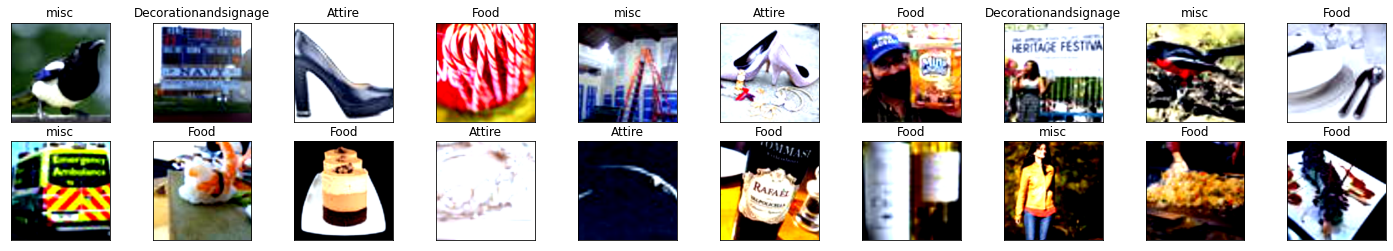

In [ ]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() 

fig = plt.figure(figsize=(25, 4))


for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

# define Resnext model
RSNET = models.vgg16(pretrained=True)


# Freeze model weights
for param in RSNET.parameters():
    param.requires_grad = False

# Add on classifier
RSNET.classifier[6] = nn.Sequential(
                      nn.Linear(4096,1024),
                      nn.ReLU(), 
                      nn.Dropout(0.10),
                      nn.Linear(1024,512),
                      nn.ReLU(), 
                      nn.Dropout(0.10),
                      nn.Linear(512,4),                   
                      nn.LogSoftmax(dim=1))

device = 'cuda' if torch.cuda.is_available() else 'cpu'

RSNET = RSNET.cuda().to(device)
print('Use ' + device)


Use cuda


In [ ]:
RSNET.load_state_dict(torch.load('/content/drive/My Drive/gala_type4.pt'))

mod = list(RSNET.classifier.children())
mod1=list(mod[-1].children())
print(mod1)
mod1.pop()
mod1.pop()
print(mod1)

mod1.append(nn.Linear(512,256))
mod1.append(nn.ReLU())
mod1.append(nn.Dropout(0.10))
mod1.append(nn.Linear(256,4))
mod1.append(nn.LogSoftmax(dim=1))
print(mod1)

#Replace vgg16's classifier with this new classifier
new_classifier = nn.Sequential(*mod1)
RSNET.classifier[6]=new_classifier

"""
RSNET.classifier[6] = nn.Sequential(
                      nn.Linear(4096,4),           
                      nn.LogSoftmax(dim=1))

"""

"""

                      nn.ReLU(), 
                      nn.Dropout(0.10),
                      nn.Linear(1024,512), 
                      nn.ReLU(), 
                      nn.Dropout(0.10),
                      nn.Linear(512,256), 
                      nn.ReLU(), 
                      nn.Dropout(0.10),
                      nn.Linear(256,4),    
"""
for name,param in RSNET.classifier[6].named_parameters():
    param.requires_grad=False

for name,param in RSNET.classifier[6][6].named_parameters():
    param.requires_grad=True

for name,param in RSNET.classifier[6][9].named_parameters():
    param.requires_grad=True

for name,param in RSNET.classifier[6].named_parameters():
      if param.requires_grad==True:
         print(name)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

RSNET = RSNET.cuda().to(device)
print('Use ' + device)


[Linear(in_features=4096, out_features=1024, bias=True), ReLU(), Dropout(p=0.1, inplace=False), Linear(in_features=1024, out_features=512, bias=True), ReLU(), Dropout(p=0.1, inplace=False), Linear(in_features=512, out_features=4, bias=True), LogSoftmax()]
[Linear(in_features=4096, out_features=1024, bias=True), ReLU(), Dropout(p=0.1, inplace=False), Linear(in_features=1024, out_features=512, bias=True), ReLU(), Dropout(p=0.1, inplace=False)]
[Linear(in_features=4096, out_features=1024, bias=True), ReLU(), Dropout(p=0.1, inplace=False), Linear(in_features=1024, out_features=512, bias=True), ReLU(), Dropout(p=0.1, inplace=False), Linear(in_features=512, out_features=256, bias=True), ReLU(), Dropout(p=0.1, inplace=False), Linear(in_features=256, out_features=4, bias=True), LogSoftmax()]
6.weight
6.bias
9.weight
9.bias
Use cuda


In [ ]:
#RSNET.load_state_dict(torch.load('/content/drive/My Drive/dataset/gala_type.pt'))
RSNET.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Sequential(
    (0): Linear(in_features=4096, out_features=1024, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.1, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.1, inplace=False)
    (9): Linear(in_features=256, out_features=4, bias=True)
    (10): LogSoftmax()
  )
)

In [ ]:
import torch.optim as optim
import torch.nn as nn
 
criterion = nn.NLLLoss()

optimizer = optim.Adam(RSNET.parameters(), lr=0.00001)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=lambda x: 1e-3 * 0.9 ** x)

In [ ]:
n_epochs = 500

valid_loss_min = np.Inf 

for epoch in range(n_epochs):

    train_loss = 0.0
    valid_loss = 0.0
    
    # train the model 
    RSNET.train()
    for batch_idx,(images, labels) in enumerate(train_loader):
        if train_on_gpu:
            images, labels = images.cuda(), labels.cuda()
        optimizer.zero_grad()
        output = RSNET(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*images.size(0)
            
    # validate the model
    
    RSNET.eval()
    for batch_idx,(images, labels) in enumerate(valid_loader):
        if train_on_gpu:
            images, labels = images.cuda(), labels.cuda()
        output = RSNET(images)
        loss = criterion(output, labels) 
        valid_loss += loss.item()*images.size(0)
    
    train_loss = train_loss/len(train_loader)
    valid_loss = valid_loss/len(valid_loader)
         
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        valid_loss_min = valid_loss
        torch.save(RSNET.state_dict(), 'gala_type4.pt') 
    #scheduler.step()
   
  

Epoch: 0 	Training Loss: 25.456816 	Validation Loss: 24.323802
Validation loss decreased (inf --> 24.323802).  Saving model ...
Epoch: 1 	Training Loss: 23.347070 	Validation Loss: 22.222985
Validation loss decreased (24.323802 --> 22.222985).  Saving model ...
Epoch: 2 	Training Loss: 21.539009 	Validation Loss: 20.417623
Validation loss decreased (22.222985 --> 20.417623).  Saving model ...
Epoch: 3 	Training Loss: 20.104221 	Validation Loss: 18.920334
Validation loss decreased (20.417623 --> 18.920334).  Saving model ...
Epoch: 4 	Training Loss: 18.988068 	Validation Loss: 17.790290
Validation loss decreased (18.920334 --> 17.790290).  Saving model ...
Epoch: 5 	Training Loss: 18.005313 	Validation Loss: 16.880518
Validation loss decreased (17.790290 --> 16.880518).  Saving model ...
Epoch: 6 	Training Loss: 17.358782 	Validation Loss: 16.181561
Validation loss decreased (16.880518 --> 16.181561).  Saving model ...
Epoch: 7 	Training Loss: 16.825830 	Validation Loss: 15.614058
Valid

In [ ]:
RSNET.load_state_dict(torch.load('/content/drive/My Drive/gala_type4.pt'))

test_loss = 0.0
class_correct = list(0. for i in range(4))
class_total = list(0. for i in range(4))

RSNET.eval()
for images, labels in test_loader:
    if train_on_gpu:
        images, labels = images.cuda(), labels.cuda()
    output = RSNET(images)
    loss = criterion(output, labels)
    test_loss += loss.item()*images.size(0)
    _, pred = torch.max(output, 1)    
    correct_tensor = pred.eq(labels.data.view_as(pred))
    correct = np.squeeze(correct_tensor.cpu().numpy())
    for i in range(4):
        label = labels.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(4):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.010338

Test Accuracy of Attire: 100% ( 1/ 1)
Test Accuracy of Decorationandsignage: 100% ( 5/ 5)
Test Accuracy of  Food: 87% ( 7/ 8)
Test Accuracy of  misc: 66% ( 4/ 6)

Test Accuracy (Overall): 85% (17/20)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

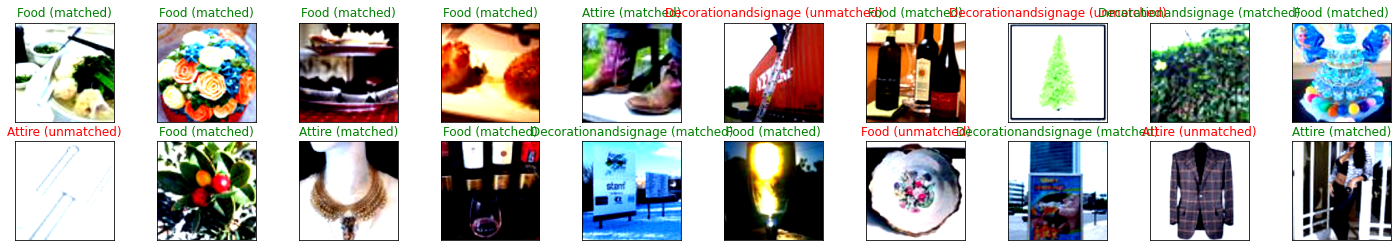

In [ ]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images.numpy()

if train_on_gpu:
    images = images.cuda()

output = RSNET(images)
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images.cpu()[idx])
    ax.set_title("{} ({})".format(classes[preds[idx]],"matched" if classes[labels[idx]]==classes[preds[idx]] else "unmatched"),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))

In [ ]:
import pandas as pd
from shutil import move
import os

os.chdir('/content/drive/My Drive/dataset')

df2 = pd.read_csv('test.csv')
test_images = os.listdir('Test Images')

img_list=list(df2.Image)
print(len(test_images))
srt_list = [x for _,x in sorted(zip(img_list,test_images))]

3219


In [ ]:
RSNET.load_state_dict(torch.load('gala_type.pt'))
data_dict={'Image':[],'Class':[]}
RSNET.eval()

transform2 = transforms.Compose([
                                transforms.Grayscale(num_output_channels=3),
                                transforms.Resize(size=256),
                                transforms.CenterCrop(size=224),
                                transforms.ToTensor(),
                                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                              ])
classes_dict=['Attire','Decorationandsignage','Food','misc']

In [ ]:
from PIL import Image 

for i in img_list:
    im=transform2((Image.open(r"/content/drive/My Drive/dataset/Test Images/"+i)).convert("RGB"))
    im = im.view(-1, 3, 224, 224)
    im=im.cuda()
    output = RSNET(im)
    _, preds_tensor = torch.max(output, 1)
    preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())
    data_dict["Class"].append(classes_dict[preds])

In [ ]:
print(len(data_dict["Class"]))
data_dict["Image"]=img_list
dframe=pd.DataFrame(data_dict)
print(dframe[:100])

3219
             Image                 Class
0    image6245.jpg                  Food
1   image10409.jpg  Decorationandsignage
2    image8692.jpg                  Food
3   image10517.jpg                  Food
4    image2580.jpg                Attire
..             ...                   ...
95   image3503.jpg                Attire
96   image2252.jpg                Attire
97   image2767.jpg                  Food
98  image10562.jpg  Decorationandsignage
99   image7268.jpg                  Food

[100 rows x 2 columns]


In [ ]:
dframe.to_csv('solution.csv',index = False)